### Problem Description: 
     The goal of this analysis to is determine the most important predictors of Alzheimer's disease.  Then using these predictors or a subset of them I will build a predictive model that can diagnose a patient as either having or not having the disease.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from statsmodels.graphics.mosaicplot import mosaic

import numpy as np

In [2]:
#Reads in Data
df = pd.read_csv('archive/alzheimers_disease_data.csv')

In [3]:
#Dropping unneeded collumns
df.drop(columns=['DoctorInCharge','PatientID'],inplace=True)

## Feature Importance


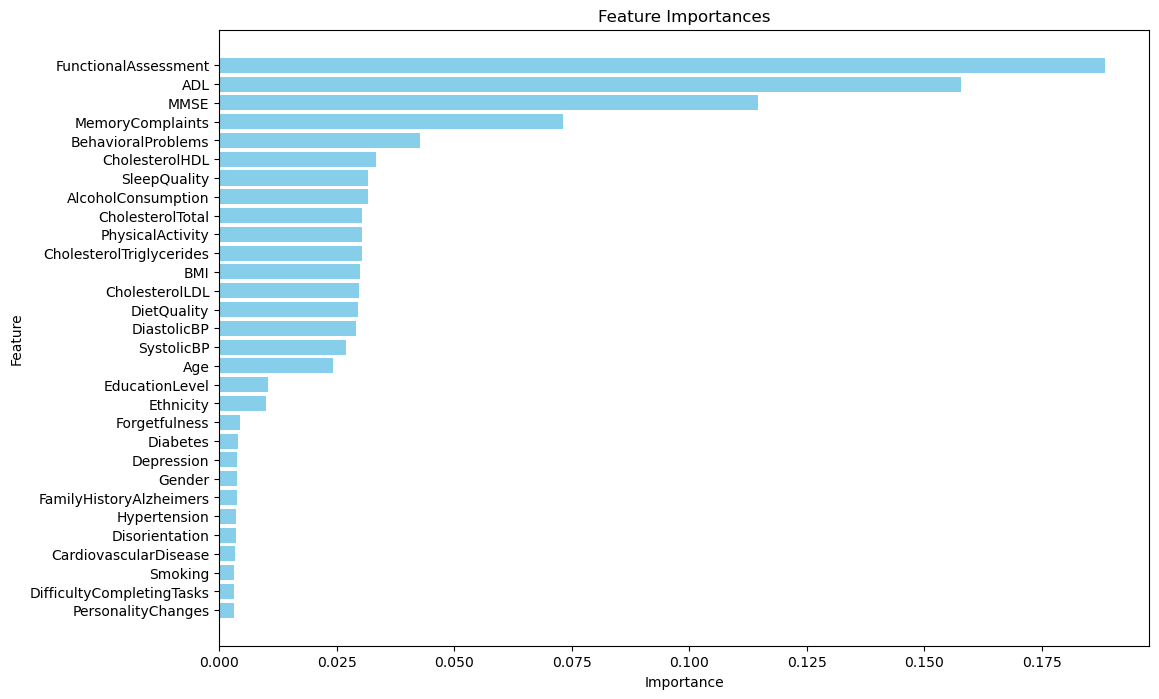

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,CholesterolHDL,SleepQuality,AlcoholConsumption,CholesterolTotal,PhysicalActivity,...,Depression,Gender,FamilyHistoryAlzheimers,Hypertension,Disorientation,CardiovascularDisease,Smoking,DifficultyCompletingTasks,PersonalityChanges,Diagnosis
0,6.518877,1.725883,21.463532,0,0,33.682563,9.025679,13.297218,242.366840,6.327112,...,1,0,0,0,0,0,0,1,0,0
1,7.118696,2.592424,20.613267,0,0,79.028477,7.151293,4.542524,231.162595,7.619885,...,0,0,0,0,0,0,0,0,0,0
2,5.895077,7.119548,7.356249,0,0,69.772292,9.673574,19.555085,284.181858,7.844988,...,0,0,1,0,1,0,0,1,0,0
3,8.965106,6.481226,13.991127,0,1,68.457491,8.392554,12.209266,159.582240,8.428001,...,0,1,0,0,0,0,1,0,0,0
4,6.045039,0.014691,13.517609,0,0,56.874305,5.597238,18.454356,237.602184,6.310461,...,0,0,0,0,0,0,0,1,1,0


In [43]:
#Training a RandomForest classifer on the data
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=14)
rf.fit(X_train, y_train)

#Plotting feature importances
importances = rf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.head(30)

# Calculate cumulative importance


plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#Extracting subset with top features
top_features = list(feature_importances['Feature'])
top_features.append('Diagnosis')
df_top = df[top_features]
df_top.head()


<Axes: >

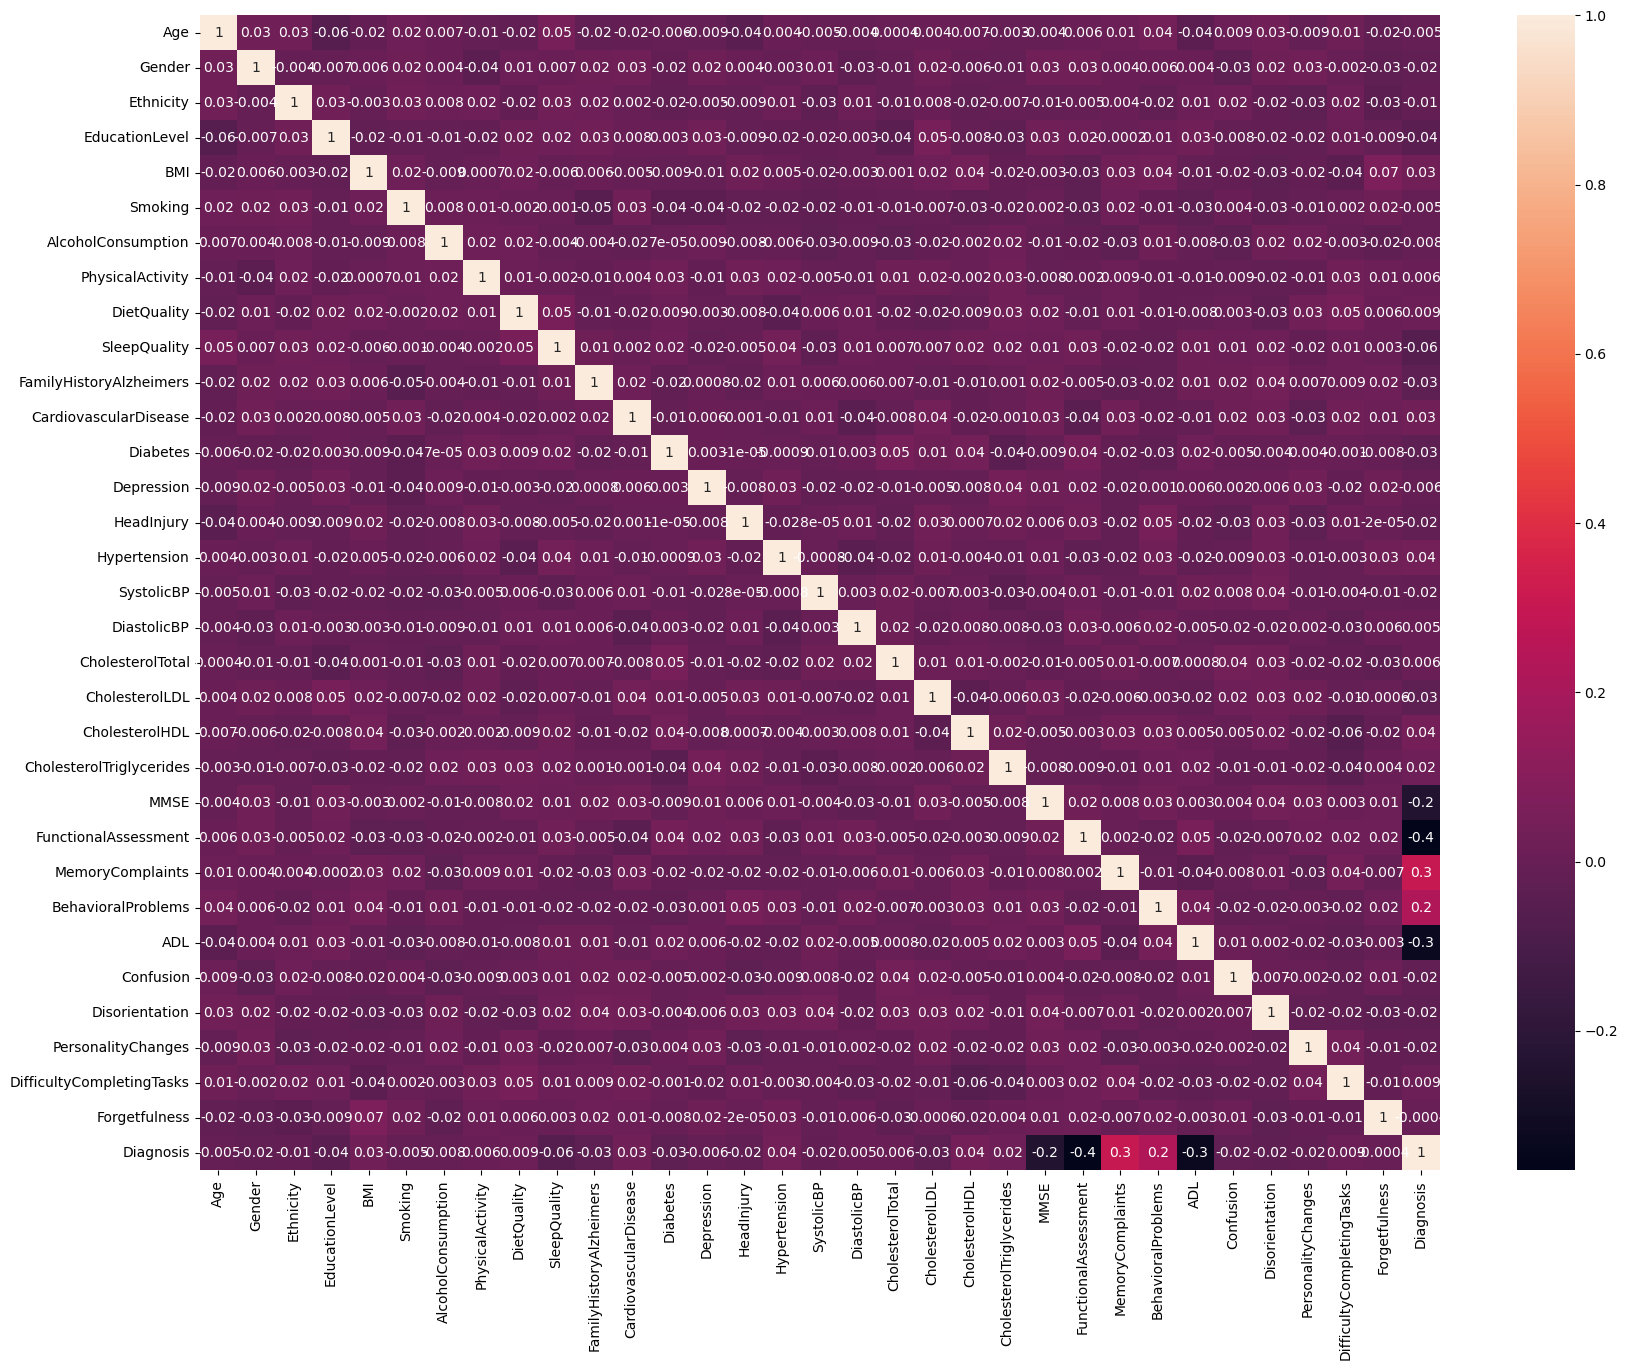

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,fmt='.1g',)

## Hyperparameter Tuning

C:\Users\josep\AppData\Local\Temp\ipykernel_21828\3702356441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['color'] = df_top['Diagnosis'].map(colors)


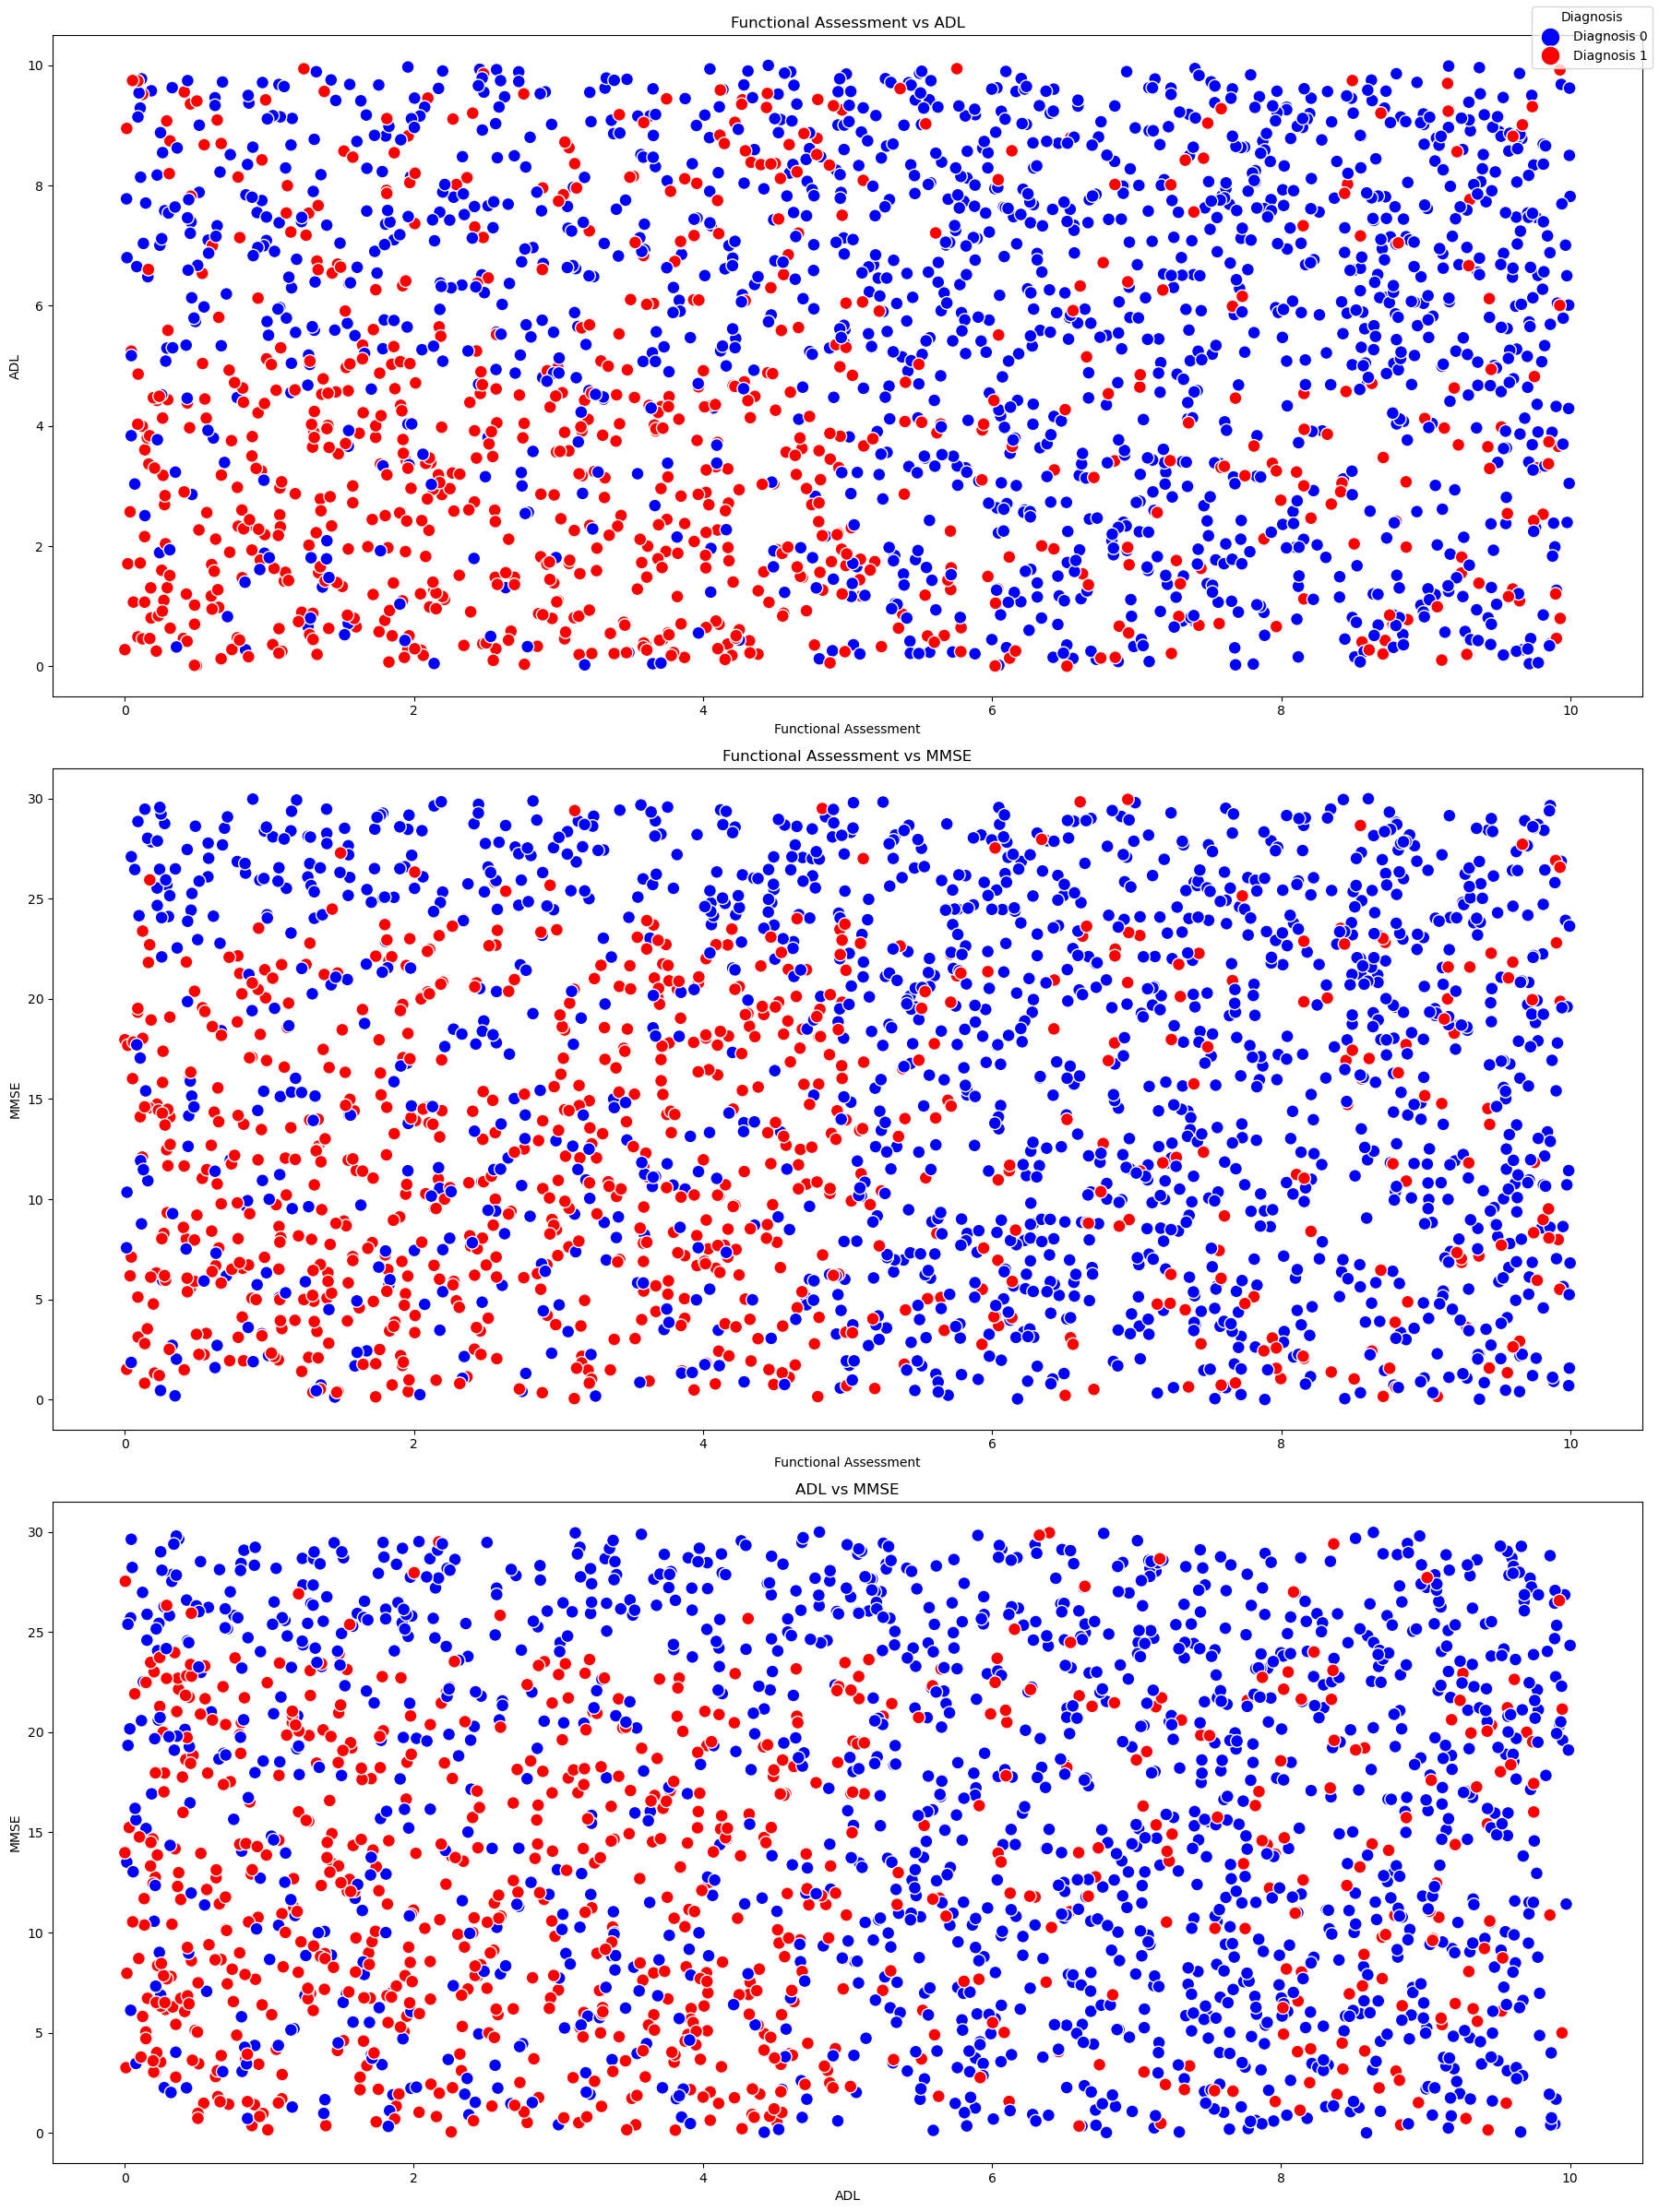

C:\Users\josep\AppData\Local\Temp\ipykernel_21828\3702356441.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.drop(columns=['color'],inplace=True)


In [21]:
variables = ['FunctionalAssessment', 'ADL', 'MMSE']
colors = {0: 'b', 1: 'r'}  # Blue for 0 and red for 1

df_top['color'] = df_top['Diagnosis'].map(colors)

fig, axs = plt.subplots(3, 1, figsize=(18, 24))

axs[0].scatter(df_top['FunctionalAssessment'], df_top['ADL'], c=df_top['color'], s=100, edgecolors='w')
axs[0].set_xlabel('Functional Assessment')
axs[0].set_ylabel('ADL')
axs[0].set_title('Functional Assessment vs ADL')

axs[1].scatter(df_top['FunctionalAssessment'], df_top['MMSE'], c=df_top['color'], s=100, edgecolors='w')
axs[1].set_xlabel('Functional Assessment')
axs[1].set_ylabel('MMSE')
axs[1].set_title('Functional Assessment vs MMSE')

axs[2].scatter(df_top['ADL'], df_top['MMSE'], c=df_top['color'], s=100, edgecolors='w')
axs[2].set_xlabel('ADL')
axs[2].set_ylabel('MMSE')
axs[2].set_title('ADL vs MMSE')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15) for color in colors.values()]
labels = ['Diagnosis 0', 'Diagnosis 1']
fig.legend(handles, labels, loc='upper right', title='Diagnosis')

plt.tight_layout()
plt.show()

df_top.drop(columns=['color'],inplace=True)

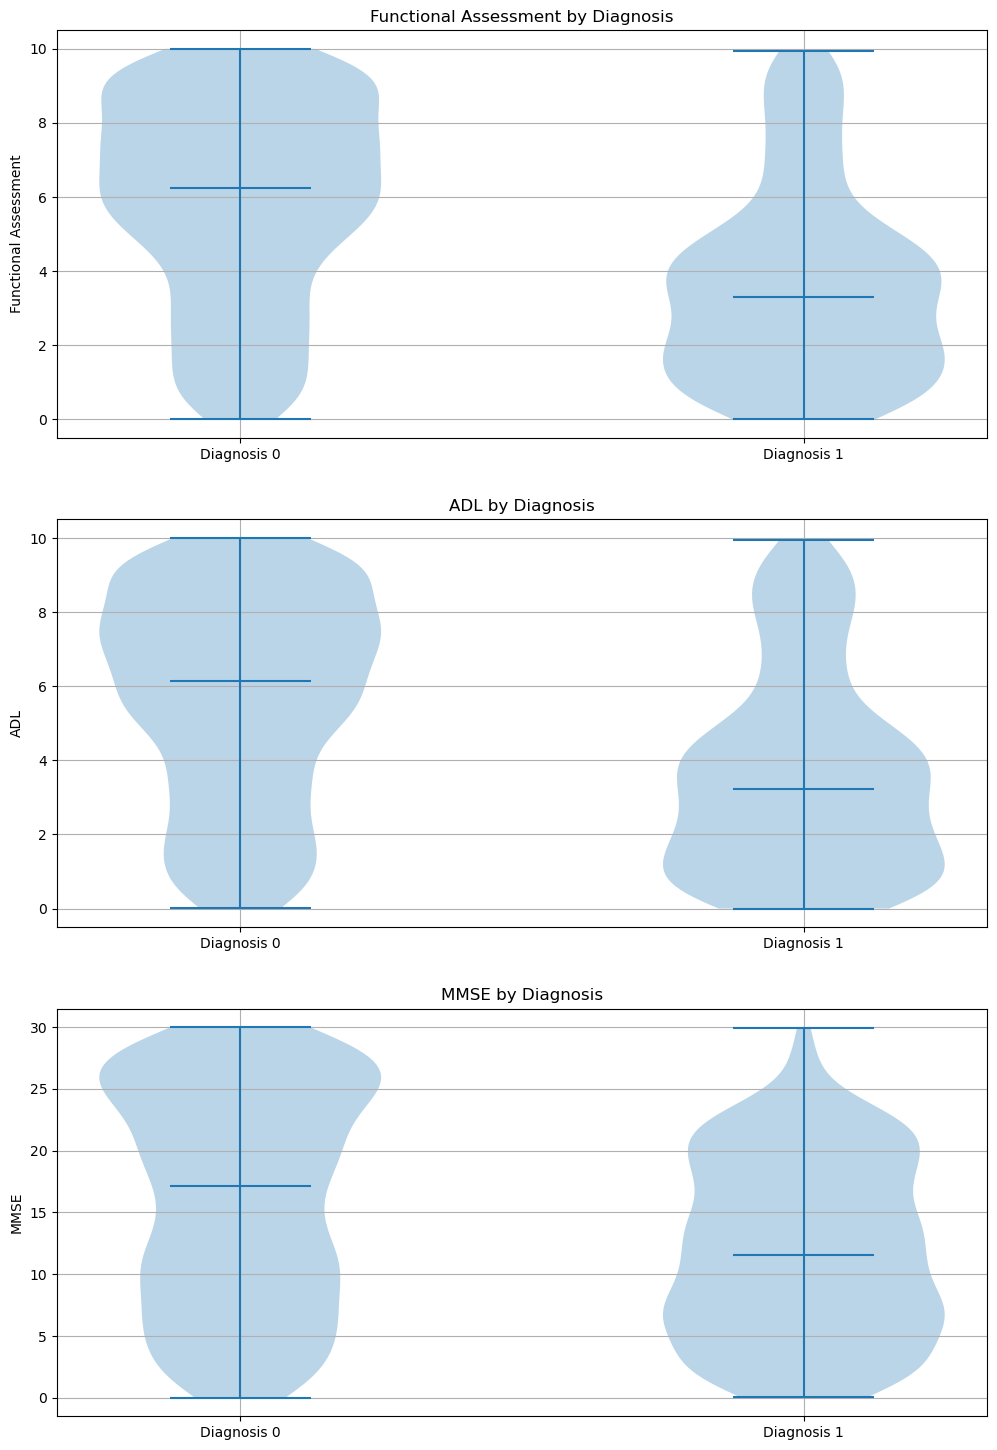

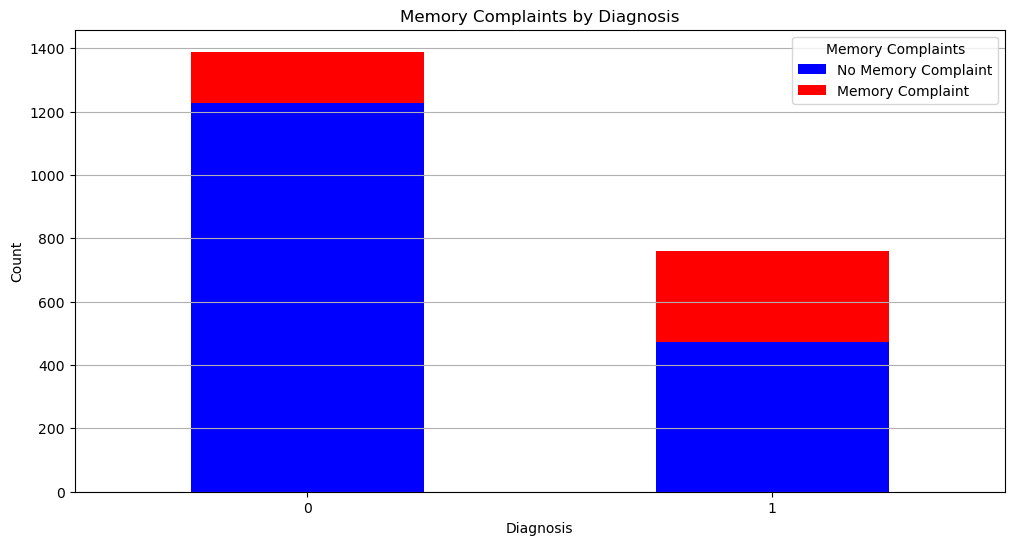

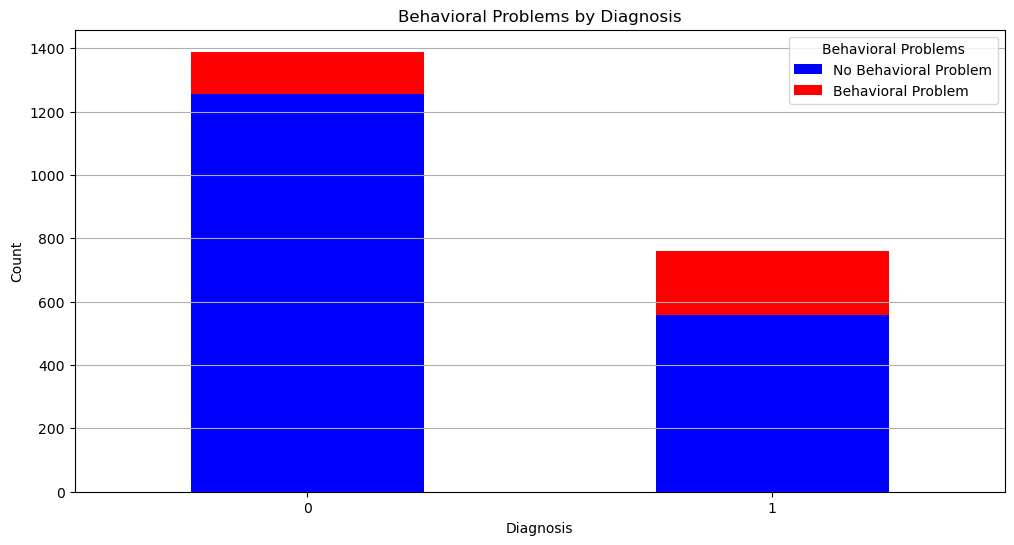

In [42]:

variables = ['FunctionalAssessment', 'ADL', 'MMSE']
colors = {0: 'b', 1: 'r'}  # Blue for 0 and red for 1

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

axs[0].violinplot([df_top[df_top['Diagnosis'] == 0]['FunctionalAssessment'],
                   df_top[df_top['Diagnosis'] == 1]['FunctionalAssessment']],
                  showmeans=False, showmedians=True)
axs[0].set_title('Functional Assessment by Diagnosis')
axs[0].set_ylabel('Functional Assessment')
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['Diagnosis 0', 'Diagnosis 1'])
axs[0].grid(True)

axs[1].violinplot([df_top[df_top['Diagnosis'] == 0]['ADL'],
                   df_top[df_top['Diagnosis'] == 1]['ADL']],
                  showmeans=False, showmedians=True)
axs[1].set_title('ADL by Diagnosis')
axs[1].set_ylabel('ADL')
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['Diagnosis 0', 'Diagnosis 1'])
axs[1].grid(True)

axs[2].violinplot([df_top[df_top['Diagnosis'] == 0]['MMSE'],
                   df_top[df_top['Diagnosis'] == 1]['MMSE']],
                  showmeans=False, showmedians=True)
axs[2].set_title('MMSE by Diagnosis')
axs[2].set_ylabel('MMSE')
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(['Diagnosis 0', 'Diagnosis 1'])
axs[2].grid(True)

memory_complaints_ct = pd.crosstab(df_top['Diagnosis'], df_top['MemoryComplaints'])

# Plotting the stacked bar plot for MemoryComplaints by Diagnosis
memory_complaints_ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])
plt.title('Memory Complaints by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Memory Complaints', labels=['No Memory Complaint', 'Memory Complaint'])
plt.grid(axis='y')
plt.show()

# Creating a cross-tabulation for BehavioralProblems by Diagnosis
behavioral_problems_ct = pd.crosstab(df_top['Diagnosis'], df_top['BehavioralProblems'])

# Plotting the stacked bar plot for BehavioralProblems by Diagnosis
behavioral_problems_ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])
plt.title('Behavioral Problems by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Behavioral Problems', labels=['No Behavioral Problem', 'Behavioral Problem'])
plt.grid(axis='y')

plt.show()

In [35]:
df_top.head()
df_top.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FunctionalAssessment  2149 non-null   float64
 1   ADL                   2149 non-null   float64
 2   MMSE                  2149 non-null   float64
 3   MemoryComplaints      2149 non-null   int64  
 4   BehavioralProblems    2149 non-null   int64  
 5   Diagnosis             2149 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 100.9 KB


KeyError: True

In [24]:
X_top = df_top.drop(columns=['Diagnosis'])
y_top = df_top['Diagnosis']
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=14)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=14)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_top, y_train_top)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')
y_pred = grid_search.best_estimator_.predict(X_test_top)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.9567906976744185


Accuracy: 0.9410852713178295
Precision: 0.9412472249517778
Recall: 0.9410852713178295
F1 Score: 0.9411561902850979
Confusion Matrix:
[[414  20]
 [ 18 193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       434
           1       0.91      0.91      0.91       211

    accuracy                           0.94       645
   macro avg       0.93      0.93      0.93       645
weighted avg       0.94      0.94      0.94       645



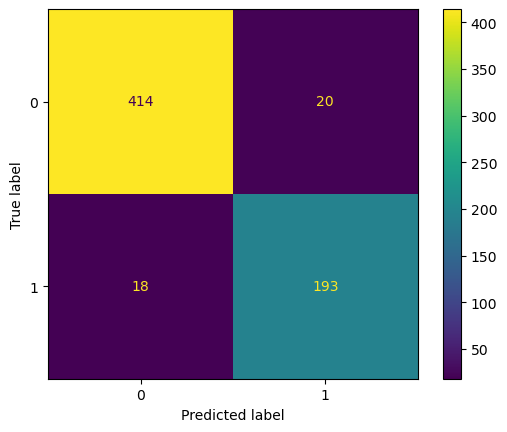

In [26]:
accuracy = accuracy_score(y_test_top, y_pred)
precision = precision_score(y_test_top, y_pred, average='weighted')
recall = recall_score(y_test_top, y_pred, average='weighted')
f1 = f1_score(y_test_top, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_top, y_pred)
class_report = classification_report(y_test_top, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = cmd(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Conclusion/Findings:

    The most important predictors of Alzheimer's disease ended up being, perhaps unsurprisingly, the results of various assessments used to measure the patient's mental and physical abilities. This includes the result of a Functional Test of the patient's physical abilities and ADL, which is a measure of the patient's ability to perform daily tasks, and the MMSE (Mini-Mental State Examination score), which is a measure of cognitive impairment. After these features, common symptoms of the disease, such as Behavioral Problems and Memory Complaints, are the next strongest predictors. Using only these five predictors, I trained a random forest classifier to predict the presence of Alzheimer's disease with approximately 94% accuracy.
    
    These results indicate the importance of mental and physical assessments in diagnosing Alzheimer's disease. The finding that behavior issues and memory problems are important predictors of the disease underscores the importance of seeing a doctor if one recognizes these symptoms in themselves or others.